# Fintech Machine Learning Project 1: NVDA Price Prediction

## Data Collection Considerations:
Considering this project aims to predict the closing price of NASDAQ: NVDA for the period of 25 October - 7 November, it is important to consider the various factors that could influence stock price movement in the short term. The following are some considerations that this project would consider to predict the price of NVDA besides the historical closing price of NVDA itself. These considerations would shape the dataset used to train the model.

### 1. Technical Indicators:
Technical indicators as variables in the machine learning model capture market dynamics and historical trends, offering a data-driven approach for informed stock price predictions, improving decision-making and performance. Below are indicators selected based on success in day trading; trend indicators, momentum indicators as well as volume indicators.   
  * Simple Moving Average (SMA): Provides a basic trend-following signal.
  * Exponential Moving Average (EMA): Offers a more responsive moving average for shorter-term trends.
  * 7-day Relative Strength Index (RSI): Measures momentum and identifies overbought/oversold conditions.
  * Average Directional Index (ADX): Evaluates trend strength.
  * Bollinger Bands: Useful for assessing volatility and potential reversals.
  * Volume: Basic indicator to assess market participation.
  * On-Balance Volume (OBV): Measures buying and selling pressure based on volume.
  * Moving Average Convergence Divergence (MACD): Provides insight into potential trend changes.
  * Stochastic Oscillator: Helps identify potential turning points in price movements.

### 2. Macro-Economics: Related Industry / Market Sentiment
These are important information in the macro-economic climate that could also have an influence on the price of NVDA, thus should provide relevant information that could further enhance the accuracy of the stock price prediction. I specifically picked AI index due to the recent AI boom that has had a big influence in the price of NVDA
  * NASDAQ Composite Index (^IXIC): Reflective of the general economy
  * S&P 500 Index (^GSPC): Reflective of the general economy
  * Global X Artificial Intelligence & Technology ETF (AIQ): AI stock index


This will give us a total of 13 variables that will act as features for our ML model.

# 1. Data Collection

In [1]:
pip install pandas_ta

In [2]:
# imports for data manipulations
import pandas as pd
import numpy as np

# imports for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# imports for yahoo finance
import yfinance as yf
import pandas_ta as ta

# For time stamps
import datetime

In [3]:
# relevant tickers
ticks = ["^IXIC", "^GSPC", "AIQ"]

# Define the start and end dates
start_date = datetime.datetime(2018, 5, 16) ## the start date because of AIQ
end_date = datetime.datetime.today()

# Download the data for the specified date range
# we separate NVDA with the other ticks
nvda = yf.download(tickers = "NVDA", start=start_date, end=end_date)
others = yf.download(tickers = ticks, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  3 of 3 completed


## 2. Descriptive Analysis

In [4]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1368 entries, 2018-05-16 to 2023-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1368 non-null   float64
 1   High       1368 non-null   float64
 2   Low        1368 non-null   float64
 3   Close      1368 non-null   float64
 4   Adj Close  1368 non-null   float64
 5   Volume     1368 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 74.8 KB


In [5]:
others.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1368 entries, 2018-05-16 to 2023-10-20
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AIQ)    1368 non-null   float64
 1   (Adj Close, ^GSPC)  1368 non-null   float64
 2   (Adj Close, ^IXIC)  1368 non-null   float64
 3   (Close, AIQ)        1368 non-null   float64
 4   (Close, ^GSPC)      1368 non-null   float64
 5   (Close, ^IXIC)      1368 non-null   float64
 6   (High, AIQ)         1368 non-null   float64
 7   (High, ^GSPC)       1368 non-null   float64
 8   (High, ^IXIC)       1368 non-null   float64
 9   (Low, AIQ)          1368 non-null   float64
 10  (Low, ^GSPC)        1368 non-null   float64
 11  (Low, ^IXIC)        1368 non-null   float64
 12  (Open, AIQ)         1368 non-null   float64
 13  (Open, ^GSPC)       1368 non-null   float64
 14  (Open, ^IXIC)       1368 non-null   float64
 15  (Volume, AIQ)       1368 non-null   i

In [6]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-16,61.000000,62.130001,60.627499,61.502499,60.898140,55382800
2018-05-17,61.520000,62.875000,61.357498,61.927502,61.318985,51978400
2018-05-18,62.452499,63.092499,61.435001,61.485001,60.880817,48371600
2018-05-21,62.470001,62.507500,60.122501,61.060001,60.460003,64062400
2018-05-22,61.195000,61.450001,60.062500,60.674999,60.078777,51826400


In [7]:
others.head()

Adj Close                             Close               \
                  AIQ        ^GSPC        ^IXIC     AIQ        ^GSPC   
Date                                                                   
2018-05-16  14.668479  2722.459961  7398.299805  15.036  2722.459961   
2018-05-17  14.730916  2720.129883  7382.470215  15.100  2720.129883   
2018-05-18  14.617748  2712.969971  7354.339844  14.984  2712.969971   
2018-05-21  14.647992  2733.010010  7394.040039  15.015  2733.010010   
2018-05-22  14.584579  2724.439941  7378.459961  14.950  2724.439941   

                           High                              Low               \
                  ^IXIC     AIQ        ^GSPC        ^IXIC    AIQ        ^GSPC   
Date                                                                            
2018-05-16  7398.299805  15.060  2727.760010  7413.319824  15.01  2712.169922   
2018-05-17  7382.470215  15.180  2731.959961  7425.390137  15.01  2711.360107   
2018-05-18  7354.339844  15.045  2719.500000  7381.160156  14.95  2709.179932   
2018-05-21  7394.040039  15.105  2739.189941  7431.830078  14.93  2725.699951   
2018-05-22  7378.459961  15.110  2742.239990  7432.529785  14.95  2721.879883   

                          Open                           Volume              \
                  ^IXIC    AIQ        ^GSPC        ^IXIC    AIQ       ^GSPC   
Date                                                                          
2018-05-16  7356.160156  15.04  2712.620117  7356.220215   6200  3248480000   
2018-05-17  7350.459961  15.02  2719.709961  7379.580078  57100  3478150000   
2018-05-18  7343.970215  15.03  2717.350098  7364.339844  47500  3383270000   
2018-05-21  7368.209961  15.10  2735.389893  7406.339844  31100  3053480000   
2018-05-22  7370.330078  15.11  2738.340088  7420.850098  27500  3384140000   

                        
                 ^IXIC  
Date                    
2018-05-16  2103060000  
2018-05-17  1958970000  
2018-05-18  1982190000  
2018-05-21  1997220000  
2018-05-22  1927420000

In [8]:
nvda.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1.368000e+03
mean,153.349090,156.255279,150.364632,153.421071,153.168874,4.688379e+07
std,111.325357,113.319225,109.119591,111.237892,111.304228,2.107987e+07
min,31.622499,32.494999,31.115000,31.770000,31.526001,9.788400e+06
25%,61.491250,62.311251,60.294376,61.418125,61.018449,3.227870e+07
50%,133.032501,135.035004,130.677498,133.081245,132.793648,4.342940e+07
75%,208.114998,210.637505,204.779999,207.040001,206.747700,5.723840e+07
max,502.160004,502.660004,489.579987,493.549988,493.509338,2.511528e+08


In [9]:
others.describe()

Adj Close                                   Close               \
               AIQ        ^GSPC         ^IXIC          AIQ        ^GSPC   
count  1368.000000  1368.000000   1368.000000  1368.000000  1368.000000   
mean     21.919272  3615.146367  10989.124225    22.125604  3615.146367   
std       5.748972   665.325908   2666.040545     5.698785   665.325908   
min      11.946674  2237.399902   6192.919922    12.246000  2237.399902   
25%      16.074367  2929.767517   8109.427490    16.370001  2929.767517   
50%      21.804905  3733.700073  11236.065430    21.960000  3733.700073   
75%      27.376792  4197.299805  13430.320312    27.440001  4197.299805   
max      33.187347  4796.560059  16057.440430    33.419998  4796.560059   

                            High                                     Low  \
              ^IXIC          AIQ        ^GSPC         ^IXIC          AIQ   
count   1368.000000  1368.000000  1368.000000   1368.000000  1368.000000   
mean   10989.124225    22.295643  3636.502126  11071.100824    21.941466   
std     2666.040545     5.733572   668.139146   2684.136351     5.657981   
min     6192.919922    12.460000  2300.729980   6355.180176    12.190000   
25%     8109.427490    16.455251  2940.292419   8146.352417    16.277501   
50%    11236.065430    22.175000  3761.494995  11330.475098    21.705000   
75%    13430.320312    27.686250  4217.617554  13561.142090    27.163249   
max    16057.440430    33.450001  4818.620117  16212.230469    33.099998   

                                         Open                             \
             ^GSPC         ^IXIC          AIQ        ^GSPC         ^IXIC   
count  1368.000000   1368.000000  1368.000000  1368.000000   1368.000000   
mean   3591.244370  10897.018694    22.131784  3614.719428  10988.055288   
std     662.509845   2646.533587     5.701059   665.224080   2668.523752   
min    2191.860107   6190.169922    12.190000  2290.709961   6257.859863   
25%    2915.535034   8061.190063    16.377500  2926.235046   8106.095215   
50%    3707.260010  11093.380371    22.000000  3732.209961  11226.725098   
75%    4176.367676  13289.924805    27.445000  4198.260132  13408.200195   
max    4780.040039  16017.230469    33.410000  4804.509766  16120.919922   

              Volume                              
                 AIQ         ^GSPC         ^IXIC  
count    1368.000000  1.368000e+03  1.368000e+03  
mean    59334.649123  4.235037e+09  3.983941e+09  
std    112888.630107  1.065933e+09  1.498079e+09  
min       600.000000  0.000000e+00  9.589500e+08  
25%     10975.000000  3.570618e+09  2.427260e+09  
50%     20600.000000  4.002705e+09  4.252020e+09  
75%     40100.000000  4.637885e+09  4.918650e+09  
max    868600.000000  9.976520e+09  1.162119e+10

# 3. Data Cleaning and Pre-processing
For NVDA we will add the technical indicators and for the other ticks, we will only simply use the data as such.

In [10]:
## add the technical indicators into the dataframe
## the technical indicators duration are adjusted to fit the 7 day prediction period
## for this project
nvda.ta.sma(length=5, append=True)  # 5-day Simple Moving Average
nvda.ta.ema(length=12, append=True)  # 12-day Exponential Moving Average
nvda.ta.rsi(length=7, append=True)   # 7-day Relative Strength Index
nvda.ta.adx(length=7, append=True)  # 7-day Average Directional Index
nvda.ta.bbands(append=True)  # Bollinger Bands
nvda.ta.obv(append=True)  # On-Balance Volume
nvda.ta.macd(append=True)  # Moving Average Convergence Divergence
nvda.ta.stoch(append=True)  # Stochastic Oscillator
nvda.dropna(inplace =True) # drop the na values

In [11]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_5,EMA_12,RSI_7,ADX_7,...,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,OBV,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,STOCHk_14_3_3,STOCHd_14_3_3
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,60.910000,60.970001,59.125000,59.209999,58.664440,22273200,59.6280,61.325074,33.920835,58.673024,...,59.6280,60.904725,4.282301,0.336300,-97698400.0,-0.901981,-0.823032,-0.078949,13.491693,12.376713
2018-07-05,59.767502,60.732498,59.375000,60.682499,60.123367,30621600,59.9785,61.226217,45.323972,57.979437,...,59.9785,61.258515,4.268247,0.774996,-67076800.0,-0.886428,-0.645983,-0.240445,20.873673,16.746712
2018-07-06,60.435001,61.917500,60.220001,61.832500,61.262764,29635200,60.3020,61.319491,52.752882,52.353541,...,60.3020,62.283146,6.570747,0.886267,-37441600.0,-0.772402,-0.425566,-0.346836,26.958011,20.441126
2018-07-09,62.582500,62.680000,61.517502,62.312500,61.738342,30388000,60.9195,61.472262,55.684915,45.053843,...,60.9195,63.088706,7.121551,0.821085,-7053600.0,-0.635972,-0.231309,-0.404663,40.726469,29.519384
2018-07-10,62.437500,63.535000,62.029999,63.312500,62.729130,36001600,61.4700,61.755375,61.493073,40.650740,...,61.4700,64.293300,9.185946,0.826303,28948000.0,-0.442064,-0.029920,-0.412144,52.865526,40.183335


In [12]:
## drop Open, High and Low, we will use Close as target and the rest as features
df = nvda.drop(['Open', 'High', 'Low'], axis=1)
df2 = others.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
## merge the other stock data indices
df = pd.merge(df, df2, on = "Date", how = "left")
df.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df.columns]
df.head(10)

<ipython-input-12-52a3178d9b16>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = pd.merge(df, df2, on = "Date", how = "left")


,Close,Adj Close,Volume,SMA_5,EMA_12,RSI_7,ADX_7,DMP_7,DMN_7,BBL_5_2.0,...,MACDh_12_26_9,MACDs_12_26_9,STOCHk_14_3_3,STOCHd_14_3_3,Close_AIQ,Close_^GSPC,Close_^IXIC,Volume_AIQ,Volume_^GSPC,Volume_^IXIC
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,59.209999,58.664440,22273200,59.6280,61.325074,33.920835,58.673024,9.528149,31.793247,58.351275,...,-0.823032,-0.078949,13.491693,12.376713,15.050,2713.219971,7502.669922,5400,1911460000,1171420000
2018-07-05,60.682499,60.123367,30621600,59.9785,61.226217,45.323972,57.979437,8.408545,28.057384,58.698484,...,-0.645983,-0.240445,20.873673,16.746712,15.200,2736.610107,7586.430176,8700,2980160000,1754690000
2018-07-06,61.832500,61.262764,29635200,60.3020,61.319491,52.752882,52.353541,16.549083,24.337487,58.320854,...,-0.425566,-0.346836,26.958011,20.441126,15.414,2759.820068,7688.390137,7300,2590250000,1718600000
2018-07-09,62.312500,61.738342,30388000,60.9195,61.472262,55.684915,45.053843,21.246496,22.006381,58.750293,...,-0.231309,-0.404663,40.726469,29.519384,15.540,2784.169922,7756.200195,10900,3070060000,1844440000
2018-07-10,63.312500,62.729130,36001600,61.4700,61.755375,61.493073,40.650740,25.741280,19.225092,58.646699,...,-0.029920,-0.412144,52.865526,40.183335,15.590,2793.840088,7759.200195,147500,3080140000,1735230000
2018-07-11,61.882500,61.312309,36750800,62.0045,61.774933,50.459573,36.019408,22.371395,18.879494,60.307943,...,0.010373,-0.409550,53.757079,49.116358,15.485,2774.020020,7716.609863,14000,2986180000,1768480000
2018-07-12,62.807499,62.228783,34550800,62.4295,61.933789,56.367669,33.640575,24.567728,16.559985,61.301004,...,0.097849,-0.385088,60.409856,55.677487,15.780,2798.290039,7823.919922,10500,2834230000,1930830000
2018-07-13,62.330002,61.755684,24698800,62.5290,61.994745,52.590461,30.293398,22.117045,17.973894,61.550892,...,0.120586,-0.354941,64.684761,59.617232,15.788,2801.310059,7825.979980,5800,2619790000,1727500000
2018-07-16,62.049999,61.478256,19703600,62.4765,62.003246,50.285205,27.429112,20.661117,16.790702,61.431643,...,0.113883,-0.326471,73.230740,66.108452,15.750,2798.429932,7805.720215,5200,2819860000,1739360000


# 4. Data Exploration


## Correlation analysis
* OBV indicator very correlated to S&P 500 index closing price
* Naturally, the prices of the indices are correlated

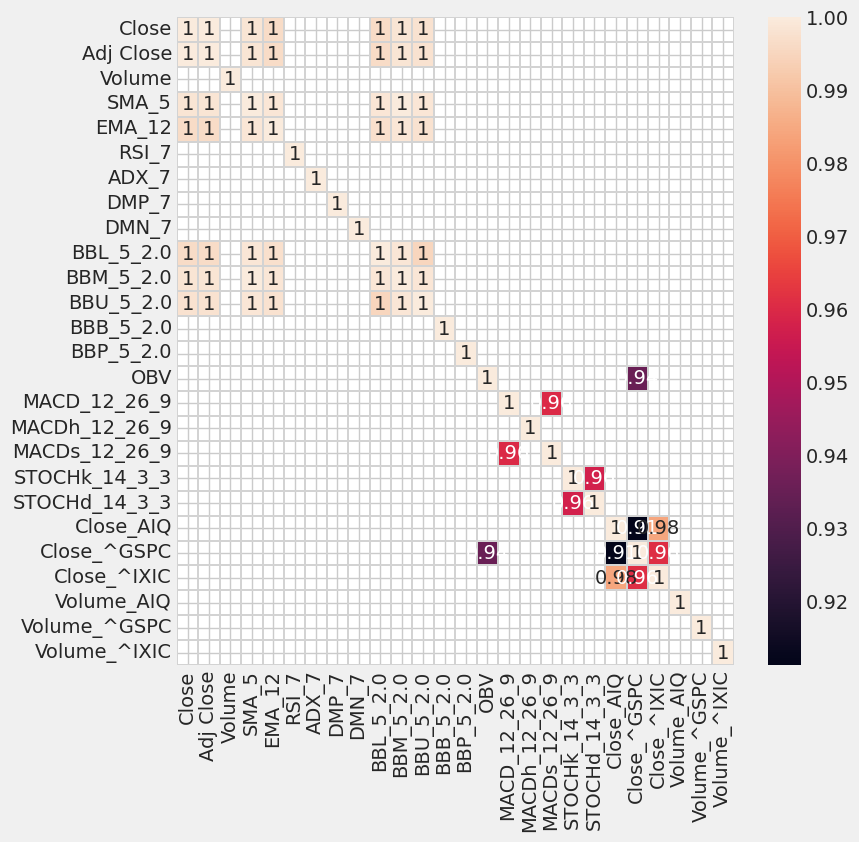

In [13]:
plt.figure(figsize=(8,8))
threshold = 0.9
corr = df.corr()
mask = corr.where((abs(corr) >= threshold)).isna()
sns.heatmap(corr,
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

## Trend analysis
* this was to test the theory that the price movement of NVDA is similar to the indices
* It is shown that S&P 500 is furthest from NVDA, followed by NASDAQ and then AIQ so it somewhat comfirms the theory that NVDA is affected more by the AI stocks
* This could mean a better feature for stock prediction for NVDA would be to use AI stocks
* For this project, considering that AIQ also follows the trend of the other indices and AI stocks would also be affected by the general economy, there is no real value in using the other indices. The AIQ index would be sufficient to capture the trends in general economy movement and at the same time capture information on the impact on NVDA due to AI stock price movemnt
* We will continue to keep volume for NASDAQ but not for S&P500
* AIQ will continue to be used

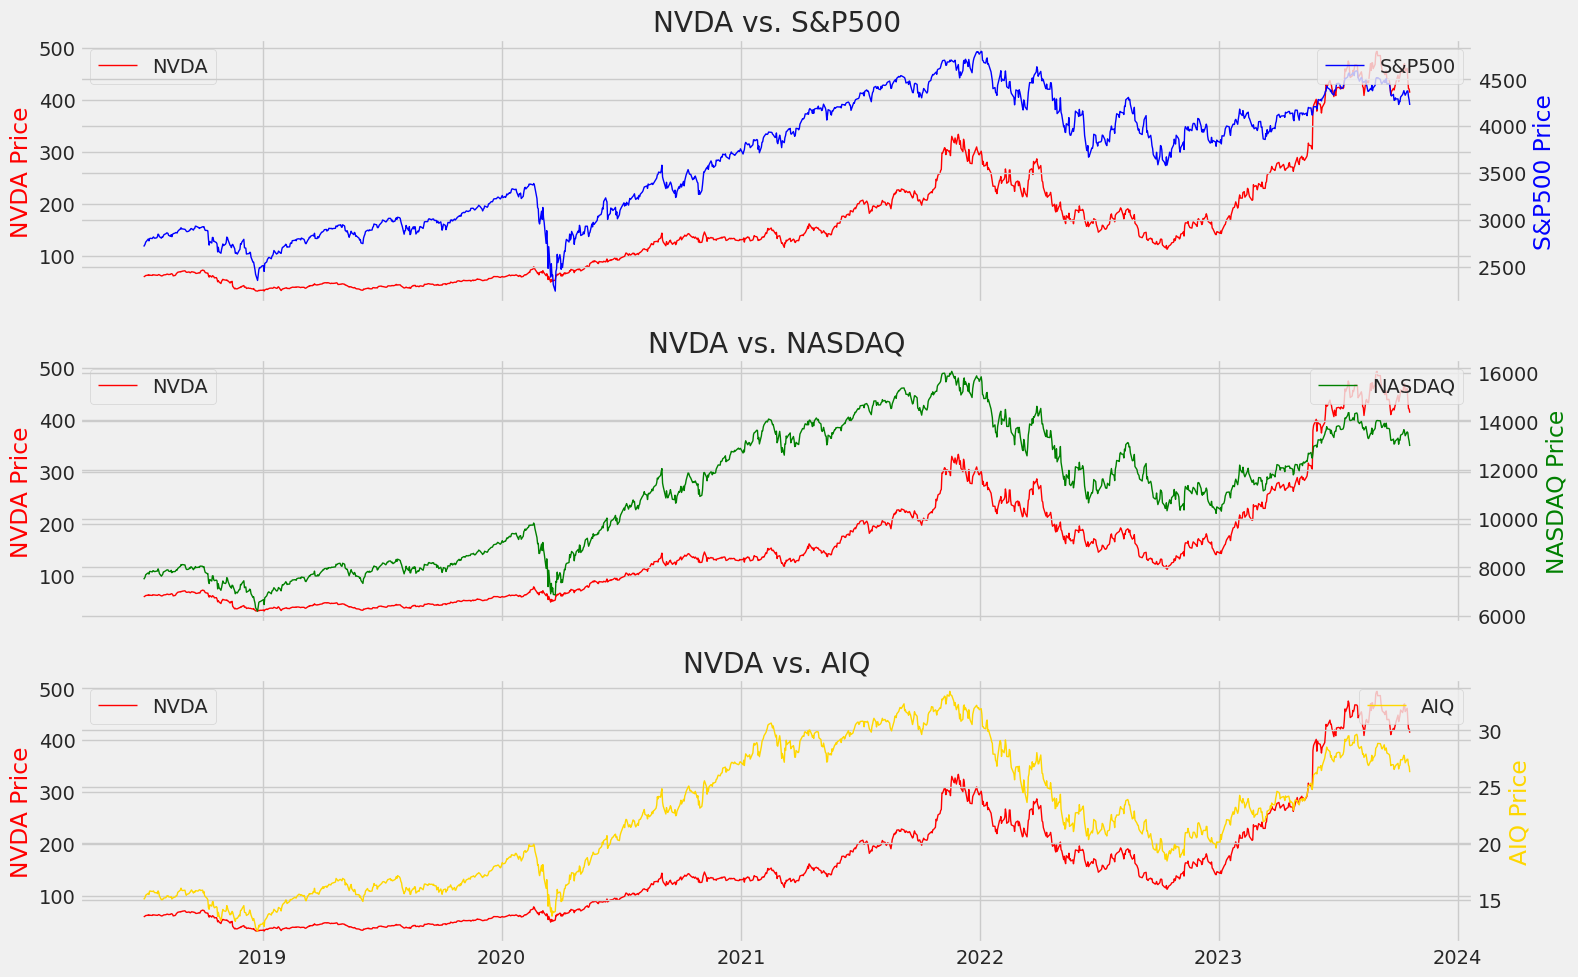

In [14]:
dates = df.index
nvda_prices = df['Close']
sp500_prices = df['Close_^GSPC']
nasdaq_prices = df['Close_^IXIC']
aiq_prices = df['Close_AIQ']

# Create separate subplots for NVDA compared to each index
# there was a need to use seperate axis because of the large price difference, individual y-axis
# was used for better visualisation
fig, axs = plt.subplots(3, 1, figsize=(16, 10), sharex=True)

# Plot NVDA vs. S&P500
axs[0].plot(dates, nvda_prices, linestyle='-', color='red', label='NVDA', linewidth=1)
axs[0].set_ylabel('NVDA Price', color='red')
axs[0].grid(True)
axs[0].legend(loc='upper left')
axs[0].set_title('NVDA vs. S&P500')
ax1 = axs[0].twinx()
ax1.plot(dates, sp500_prices, linestyle='-', color='blue', label='S&P500', linewidth=1)
ax1.set_ylabel('S&P500 Price', color='blue')
ax1.legend(loc='upper right')

# Plot NVDA vs. NASDAQ
axs[1].plot(dates, nvda_prices, linestyle='-', color='red', label='NVDA', linewidth=1)
axs[1].set_ylabel('NVDA Price', color='red')
axs[1].grid(True)
axs[1].legend(loc='upper left')
axs[1].set_title('NVDA vs. NASDAQ')
ax2 = axs[1].twinx()
ax2.plot(dates, nasdaq_prices, linestyle='-', color='green', label='NASDAQ', linewidth=1)
ax2.set_ylabel('NASDAQ Price', color='green')
ax2.legend(loc='upper right')

# Plot NVDA vs. AIQ
axs[2].plot(dates, nvda_prices, linestyle='-', color='red', label='NVDA', linewidth=1)
axs[2].set_ylabel('NVDA Price', color='red')
axs[2].grid(True)
axs[2].legend(loc='upper left')
axs[2].set_title('NVDA vs. AIQ')
ax3 = axs[2].twinx()
ax3.plot(dates, aiq_prices, linestyle='-', color='#FFD700', label='AIQ', linewidth=1)
ax3.set_ylabel('AIQ Price', color='#FFD700')
ax3.legend(loc='upper right')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [15]:
df = df.drop(['Close_^GSPC', 'Close_^IXIC', 'Volume_^GSPC'], axis=1)
df = df.dropna()
df.head()

,Close,Adj Close,Volume,SMA_5,EMA_12,RSI_7,ADX_7,DMP_7,DMN_7,BBL_5_2.0,...,BBP_5_2.0,OBV,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,STOCHk_14_3_3,STOCHd_14_3_3,Close_AIQ,Volume_AIQ,Volume_^IXIC
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,59.209999,58.664440,22273200,59.6280,61.325074,33.920835,58.673024,9.528149,31.793247,58.351275,...,0.336300,-97698400.0,-0.901981,-0.823032,-0.078949,13.491693,12.376713,15.050,5400,1171420000
2018-07-05,60.682499,60.123367,30621600,59.9785,61.226217,45.323972,57.979437,8.408545,28.057384,58.698484,...,0.774996,-67076800.0,-0.886428,-0.645983,-0.240445,20.873673,16.746712,15.200,8700,1754690000
2018-07-06,61.832500,61.262764,29635200,60.3020,61.319491,52.752882,52.353541,16.549083,24.337487,58.320854,...,0.886267,-37441600.0,-0.772402,-0.425566,-0.346836,26.958011,20.441126,15.414,7300,1718600000
2018-07-09,62.312500,61.738342,30388000,60.9195,61.472262,55.684915,45.053843,21.246496,22.006381,58.750293,...,0.821085,-7053600.0,-0.635972,-0.231309,-0.404663,40.726469,29.519384,15.540,10900,1844440000
2018-07-10,63.312500,62.729130,36001600,61.4700,61.755375,61.493073,40.650740,25.741280,19.225092,58.646699,...,0.826303,28948000.0,-0.442064,-0.029920,-0.412144,52.865526,40.183335,15.590,147500,1735230000


# 5. Implementation 1: LSTM
## Model Selection
This project will use the LSTM model for the first implemention. This is because LSTM has shown to be a powerful Recurrent Neural Network model that can handle time series data. The can also handle temporal patterns effectively which is important in stock price prediction and time series data. They can automatically learn relevant features and non-linear relationships between technical indicators and stock prices, making them valuable for analyzing complex financial data. LSTMs can handle sequences of varying lengths and are capable of incorporating multiple features, including a wide range of technical indicators.

## Pre-process for LSTM + Train Test Split
* We will use minmax scaling to scale our data for our LSTM model
* 70-30 Train test split

## Shifting Closing price by 1
* since we are using previous day data to predict future data, we should shift the closing price of a lag of 1, that will be our actual target column.
* We will use previous day closing price, high, low and volume as well as various technical indicators on "yesterday's" data to predict the "future" price
* to check if it was successful, we check the tail of our dataset to see if we have done this shift correctly

### Train Test Split (70-30) before scaling

In [16]:
split_index = int(len(df) * (1 - 0.3))

train_data, test_data = df.iloc[:split_index], df.iloc[split_index:]

### Now we scale by standardizing the data
* we will scale the train, test and validation data separately to avoid look back bias
* we perform min-max scaling to try as much as possible o restrict the values to a comfotable range while preserving relationships

In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [18]:
train_data_scaled

array([[0.09086393, 0.08993301, 0.05172594, ..., 0.13242657, 0.00854701,
        0.01992733],
       [0.09573992, 0.09476769, 0.0863143 , ..., 0.13951071, 0.01442308,
        0.0746316 ],
       [0.099548  , 0.0985435 , 0.08222754, ..., 0.14961744, 0.0119302 ,
        0.07124675],
       ...,
       [0.65551836, 0.65596829, 0.16328506, ..., 0.56881089, 0.03774929,
        0.42028223],
       [0.70595053, 0.70638194, 0.23762328, ..., 0.64295842, 0.07353989,
        0.52458583],
       [0.71489121, 0.71531935, 0.15497604, ..., 0.65537925, 0.02207977,
        0.43641299]])

## Preprocess for LSTM
Data need to be preprocessed in order to be passed to an LSTM model. In this section we will predict 1 day into the future.
Example:

Input:  
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Input preprocessed:
* X: [1, 2, 3, 4] [2, 3, 4, 5] [3, 4, 5, 6,]
* y: [5, 6, 7]

We also need to reshape X as the model expects as input a training data of shape:
* [samples, timesteps, features]


In [19]:
look_back = 14  # The length of each sequence, we use 14 days to predict next day's data
X_train, y_train, X_test, y_test = [], [], [], []

outcome_variable_index = 0

n_features = 22

# Create sequences and targets for the training data
for i in range(len(train_data_scaled) - look_back):
    X_train.append(train_data_scaled[i:i+look_back, 1:])  # Include the outcome variable (first column)
    y_train.append(train_data_scaled[i+look_back, outcome_variable_index])

# Create sequences and targets for the testing data
for i in range(len(test_data_scaled) - look_back):
    X_test.append(test_data_scaled[i:i+look_back, 1:])  # Include the outcome variable (first column)
    y_test.append(test_data_scaled[i+look_back, outcome_variable_index])

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], look_back, n_features)
X_test = X_test.reshape(X_test.shape[0], look_back, n_features)

## Finally, our LSTM model

## Consideration 1: Activation Function
Sigmoid Activation (Logistic Function):
- Range: (0, 1)
- Use cases: Output layer of binary classification models where you want to produce probabilities, but not common in hidden layers due to vanishing gradient problem.

Hyperbolic Tangent (tanh):
- Range: (-1, 1)
- Use cases: Hidden layers of deep neural networks, especially when zero-centered outputs are desired, but it suffers from the vanishing gradient problem.

Rectified Linear Unit (ReLU):
- Range: [0, +∞)
- Use cases: Hidden layers of deep neural networks, popular due to its simplicity and effectiveness. However, it's not centered around zero, and can suffer from dying ReLU problem (neurons getting stuck during training).

Exponential Linear Unit (ELU):
- Range: (-∞, +∞)
- Use cases: Like Leaky ReLU but has an exponential component for smoothness. It can be a better alternative in some cases.

Linear Activation:
- Range: (-∞, +∞)
- Use cases: Often used in the output layer for regression problems, where you want unbounded continuous values as output.

Choice: Considering we are predicting stock price which would not have a theoretical limit in price [0, +∞], the **ReLU** activation would be a logical choice to predict the price movement of stock prices. I pick an activation function that is non-linear to help to model learn the more complex patterns between technical indicators and price and adapt to price movements.

## Consideration 2: Optimization Algorithms
* Adam (Adaptive Moment Estimation) vs Adamax (Adaptive Moment Estimation with Infinity Norm):
* Choice: Adamax is often considered a more robust variant of Adam in situations where the learning rates need to be adapted differently for different parameters. It may be less sensitive to certain hyperparameters. Considering the price flunctuations and spikes which could lead to differing gradients during training of the LSTM model, the Adamax may be more efficient and more robust to the changes. Moreover, Adamax can help avoid overfitting as it is less sensitive to hyperparameters.

In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import time
start_time = time.time()
model = Sequential()
# We will explore using units at 256 for each layer and include a drop out rate to prevent overfitting
# First Input layer and LSTM layer with 0.2% dropout
model.add(LSTM(units=256, return_sequences=True, input_shape=(look_back, 22)))
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer with 0.2% dropout, we won't use return sequence true in the last layers as we don't want the previous output
model.add(LSTM(units=256))
model.add(Dropout(0.2))

# Output layer with linear activation
model.add(Dense(units=1, activation='relu'))

# Compiling the network
model.compile(optimizer='adamax', loss='mean_squared_error')

# Fitting the network
model.fit(X_train, y_train, verbose=1, epochs=50, shuffle=True, validation_split = 0.05)
end_time = time.time()

Epoch 1/50
28/28 [==============================] - 34s 496ms/step - loss: 0.0149 - val_loss: 0.0043
Epoch 2/50
28/28 [==============================] - 8s 300ms/step - loss: 0.0021 - val_loss: 0.0043
Epoch 3/50
28/28 [==============================] - 9s 307ms/step - loss: 0.0017 - val_loss: 0.0077
Epoch 4/50
28/28 [==============================] - 7s 258ms/step - loss: 0.0013 - val_loss: 0.0183
Epoch 5/50
28/28 [==============================] - 9s 306ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 6/50
28/28 [==============================] - 7s 259ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 7/50
28/28 [==============================] - 8s 299ms/step - loss: 0.0011 - val_loss: 0.0075
Epoch 8/50
28/28 [==============================] - 8s 297ms/step - loss: 0.0011 - val_loss: 0.0070
Epoch 9/50
28/28 [==============================] - 7s 258ms/step - loss: 8.9033e-04 - val_loss: 0.0084
Epoch 10/50
28/28 [==============================] - 8s 303ms/step - loss: 9.7927e-04 - val_los

# Model Evaluation
* The Mean Absolute Error and Root Mean Squared Error will be used
* I will also visualise a mini plot to see if it can predict the trend for NVDA stock price

13/13 [==============================] - 3s 68ms/step


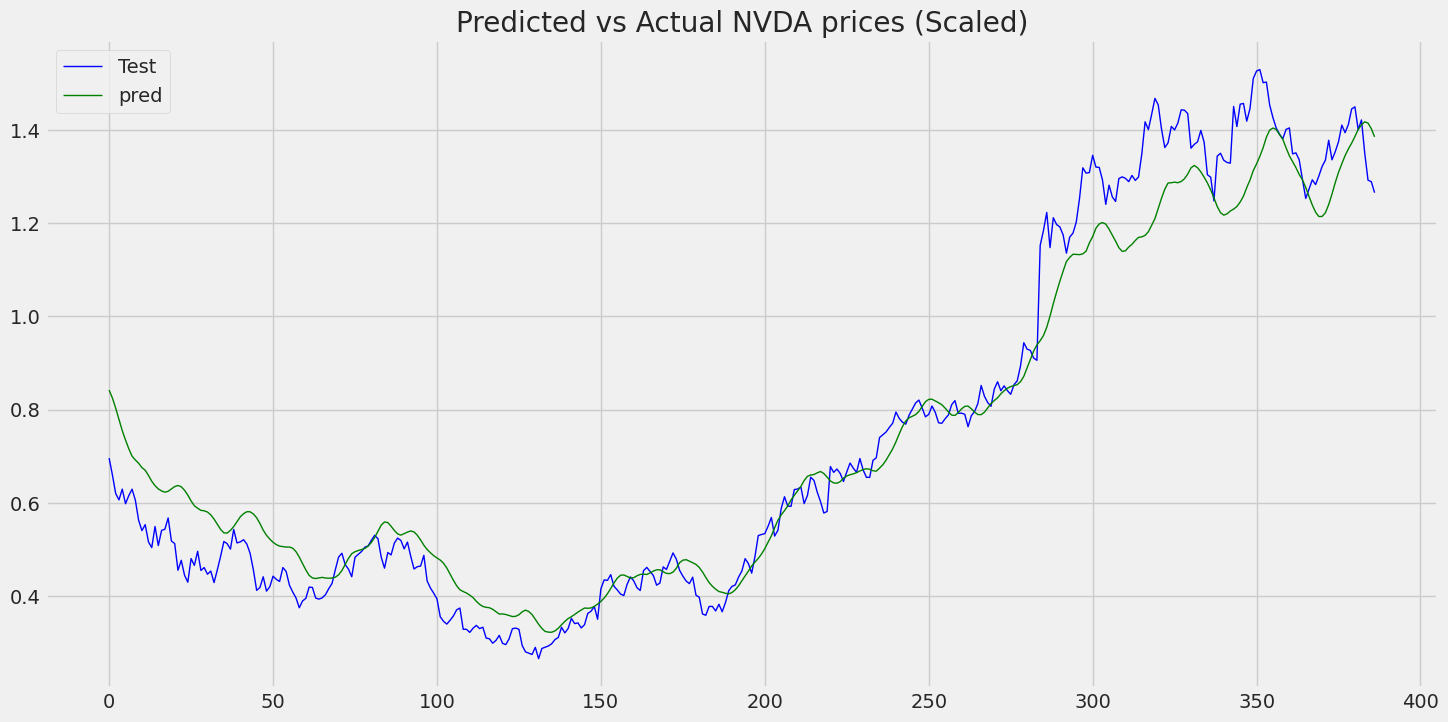

In [21]:
y_pred = model.predict(X_test)
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'blue', label = 'Test', linewidth = 1)
plt.plot(y_pred, color = 'green', label = 'pred', linewidth = 1)
plt.legend()
plt.title("Predicted vs Actual NVDA prices (Scaled)")
plt.show()

## We also want to include a plot for the actual closing price vs predicted without scaling
- we will reverse the scaling and plot the graph

In [22]:
sc.scale_[0]

0.0033113678240281053

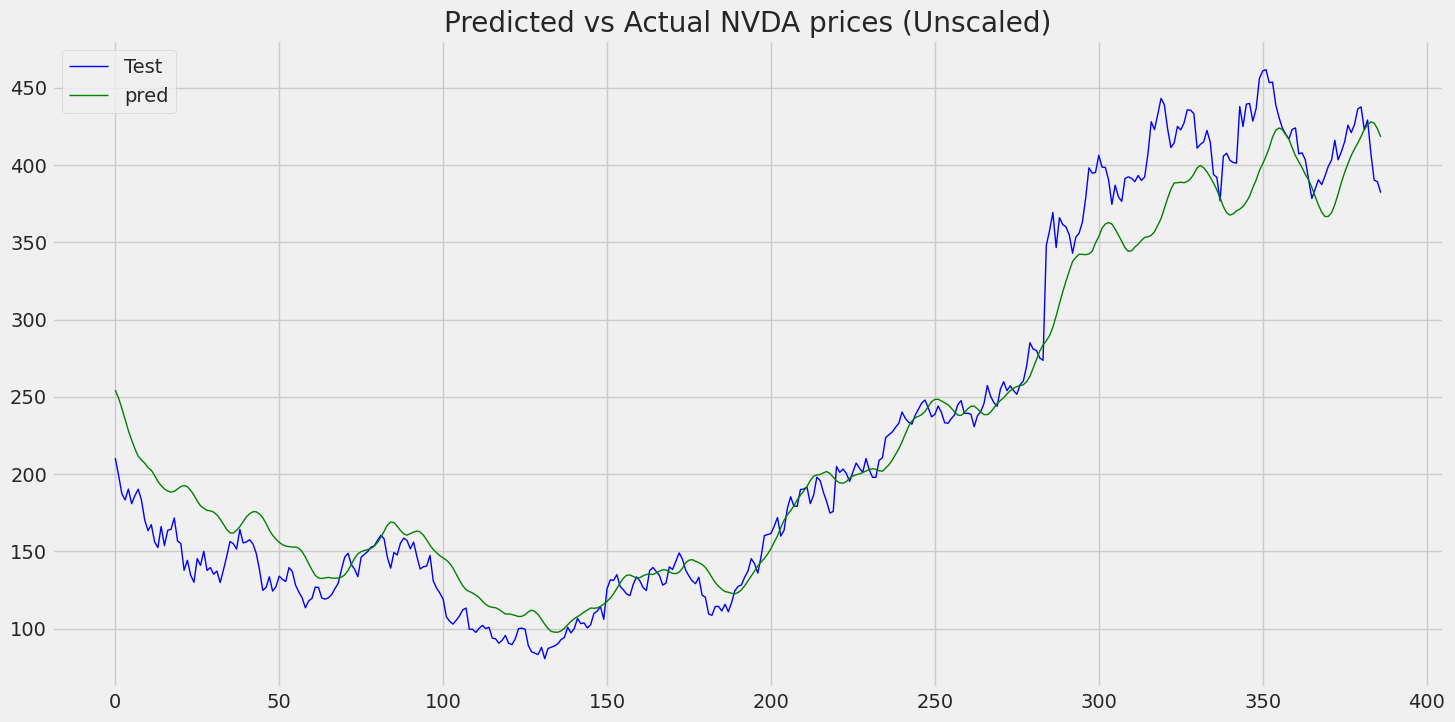

In [23]:
scale_factor = 1/sc.scale_[0]
y_pred_unscaled = y_pred * scale_factor
y_test_unscaled = y_test * scale_factor
plt.figure(figsize=(16,8))
plt.plot(y_test_unscaled, color = 'blue', label = 'Test', linewidth = 1)
plt.plot(y_pred_unscaled, color = 'green', label = 'pred', linewidth = 1)
plt.legend()
plt.title("Predicted vs Actual NVDA prices (Unscaled)")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np
# Calculate Mean Absolute Error (MAE)
mae_LSTM = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on test set: ", mae_LSTM)

# Calculate Root Mean Squared Error (RMSE)
rmse_LSTM = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on test set: ", rmse_LSTM)

Mean Absolute Error (MAE) on test set:  0.06479152319576481
Root Mean Squared Error (RMSE) on test set:  0.08535675395180786


In [25]:
from tensorflow import keras
# this is the code to save my models
model.save('LSTM_NVDA_Stock_model.h5')
model.save('LSTM_NVDA_Stock_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# a clean display table for model evaluation results
model_performance = pd.DataFrame(columns=['MAE','RMSE', 'Train-time (secs)'])
model_performance.loc['LSTM Model'] = [mae_LSTM, rmse_LSTM, end_time-start_time]
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2f}','RMSE': '{:.2f}', 'Training time': '{:.2f}'})

,MAE,RMSE,Train-time (secs)
LSTM Model,0.064792,0.09,463.322022


## The final LSTM model gave a RMSE of 0.09-0.11

# Conclusion

This project explored the use of deep learning LSTM

## LSTM
Summary: This LSTM model uses historical prices and technical indicators of NVDA to predict D+1 price.

The use of technical indicators and a benchmark index has shown to provide some predictive power to the price movement of NVDA. The model is fairly accurate in predicting the stock price of NVDA but it is important to note that it only predicts the short term price movement and will not be of much use in predicting future extrapolated prices.
  * One potential improvement could be to explore using returns / decision to buy/sell as a target variable instead of a regression on price. this could provide more generality a somewhat greater usefulness.
  * stock price movement is very much random due to the many unexplainable variables that can influence the market. One such variable would be market sentiment, thus it is worth exploring an ML model that can utilise sentiment analysis together with these technical indicators to predict short term price movement.

# References:

https://www.kaggle.com/code/vafaknm/stock-prices-prediction-using-classic-auto-arima

https://www.kaggle.com/code/thibauthurson/stock-price-prediction-with-lstm-multi-step-lstm

https://www.kaggle.com/code/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail

https://sg.finance.yahoo.com/quote/NVDA/history?p=NVDA

https://sg.finance.yahoo.com/quote/NVDA/history?p=NVDA

https://sg.finance.yahoo.com/quote/AIQ?p=AIQ&.tsrc=fin-srch

https://sg.finance.yahoo.com/quote/%5EIXIC?p=^IXIC&.tsrc=fin-srch


## This portion is to generate the predicted values for NVDA for 25th Oct to 7th Nov
 * This process is not trivial.
 * Take today as D0. The proper process for this model would require use of actual historic NVDA D-14 to D0 data to predict D+1 price.
 * After which, this will roll the window such that it will use D-13 to D0 actual historic NVDA data and D+1's predicted data to predict D+2.
 * Considering our model relies on 22 features to predict the price of NVDA, it would not be feasible to create 22 other models to predict the other 22 features
 * Thus for this project, we would simply use a 14 day moving average of each feature from D-14 to D0 data to fill the missing data.
    * ie. D+2 price prediction would be based on D+1 predicted price and the 14 day moving average of the features
 * This would be the limitation of this model where it would only be able to predict D+1 closing price of NVDA. This model could perhaps be supplemented by using other LSTM models to predict other features and retrieve the technical indicators as features for D+1 data. This would then allow a forecast for more than just one day  

In [27]:
historical_df = df.iloc[-14:]
historical_features = historical_df.drop("Close", axis = 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(historical_features)
scaled_features

array([[0.38323159, 0.24201131, 0.10644661, 0.        , 0.50100272,
        0.29498137, 0.43796824, 0.49037334, 0.4142107 , 0.10644661,
        0.01084367, 0.1873804 , 0.53475949, 0.2023589 , 0.        ,
        0.51781905, 0.        , 0.60961308, 0.43115768, 0.19333267,
        0.91152393, 0.71966137],
       [0.4775099 , 0.        , 0.20866919, 0.04757444, 0.60752246,
        0.03689293, 0.35584499, 0.42034494, 0.53910067, 0.20866919,
        0.        , 0.03416595, 0.64645038, 0.34615224, 0.08846529,
        0.58575374, 0.04204661, 0.67004697, 0.54457183, 0.37333298,
        0.01164987, 0.40050557],
       [0.59391867, 0.07028004, 0.31258126, 0.14079804, 0.72856149,
        0.        , 0.59463697, 0.34150753, 0.61119742, 0.31258126,
        0.07644866, 0.00353759, 0.82981488, 0.50252856, 0.21375425,
        0.67612418, 0.10769923, 0.7172167 , 0.60230741, 0.39999898,
        0.6331864 , 0.28123781],
       [0.78715341, 0.15887701, 0.45964394, 0.30760521, 0.89384825,
        0.1309087

In [29]:
# Create sequences for prediction (data processing)
look_back = 14
X_pred = []


for i in range(len(scaled_features) - look_back + 1):
    X_pred.append(scaled_features[i:i+look_back])

# Convert X_pred to a numpy array to push into model
X_pred = np.array(X_pred)
X_pred.shape
predictions = model.predict(X_pred)
predictions

1/1 [==============================] - 0s 31ms/step


array([[0.60862106]], dtype=float32)

In [30]:
# List to store the forecasted prices
forecasted_prices = []

for day in range(0, 14):  # Forecast for 14 days
    # Calculate averages for features
    feature_averages = np.mean(scaled_features, axis=0)

    # Append the feature averages to the scaled_features, this will result in 15 rows with row 15th to be the averages of 1-14
    scaled_features = np.append(scaled_features, feature_averages.reshape(1, -1), axis=0)

    # Create sequences for prediction, preprocessing for LSTM
    X_pred = []
    for i in range(len(scaled_features) - look_back):
        X_pred.append(scaled_features[i:i+look_back])

    # Convert X_pred to a numpy array
    X_pred = np.array(X_pred)

    # Use model to predict the price for the current day
    predictions = model.predict(X_pred)

    # Append the prediction for the current day to the list of forecasted prices
    forecasted_prices.append(predictions[-1])

    # Update scaled_features for the next iteration (remove the oldest row, this way we have a 14 day simple moving average)
    scaled_features = scaled_features[1:]

# Print the forecasted prices for the next 14 days
print("Forecasted Prices:", forecasted_prices)
len(forecasted_prices)

1/1 [==============================] - 0s 53ms/step
Forecasted Prices: [array([0.60862106], dtype=float32), array([0.6159095], dtype=float32), array([0.60742074], dtype=float32), array([0.6007043], dtype=float32), array([0.5940869], dtype=float32), array([0.58664304], dtype=float32), array([0.5737324], dtype=float32), array([0.5550479], dtype=float32), array([0.5345783], dtype=float32), array([0.5175166], dtype=float32), array([0.507092], dtype=float32), array([0.50959706], dtype=float32), array([0.51833504], dtype=float32), array([0.5370649], dtype=float32)]


14

In [37]:
from datetime import datetime, timedelta

# Define the start date (October 25, 2023)
start_date = datetime(2023, 10, 25)

# dataframe formating for the data
date_range = [start_date + timedelta(days=i) for i in range(14)]

# Convert the list of arrays to a DataFrame with date indices
final_df = pd.DataFrame(forecasted_prices, index=date_range)
final_df.columns = ["Predicted Price for NVDA"]

In [38]:
final_df["Predicted Price for NVDA"] = final_df["Predicted Price for NVDA"] * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
final_df

,Predicted Price for NVDA
2023-10-25,447.697174
2023-10-26,448.102264
2023-10-27,447.630463
2023-10-28,447.257141
2023-10-29,446.889343
2023-10-30,446.475616
2023-10-31,445.758057
2023-11-01,444.719574
2023-11-02,443.581879
2023-11-03,442.633575


In [41]:
final_df.to_csv("Lee_Ee_Fun_Implementation1_predictions.csv", index=True)